<a href="https://colab.research.google.com/github/atharvadesai1/ChatApp/blob/main/lungs_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/"

Lung_Disease_Dataset.zip


In [ ]:
import zipfile
zip_path = "/content/drive/My Drive/Lung_Disease_Dataset.zip"
extract_path = "/content/Lung_Disease_Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Complete!")


Extraction Complete!


In [ ]:
###### import shutil
###### import os

###### folder_path = "/content/drive/MyDrive"

###### if os.path.exists(folder_path):
######     shutil.rmtree(folder_path)
######     print(f"Deleted: {folder_path}")
###### else:
######     print(f"Folder not found: {folder_path}")

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_path = '/content/Lung_Disease_Dataset/train'
valid_path = '/content/Lung_Disease_Dataset/val'
test_path = '/content/Lung_Disease_Dataset/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(380, 380),
    batch_size=32,
    class_mode='categorical'
)

validation_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(380, 380),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(380, 380),
    batch_size=32,
    class_mode='categorical'
)

Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *


model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(380, 380, 3))

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
my_model = Sequential([
    Input(shape=(380, 380, 3)),
    model,
    GlobalMaxPooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(5, activation='softmax')
])


my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)          │ (None, 12, 12, 1792)        │      17,673,823 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 1792)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         918,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,596,452 (70.94 MB)

 Trainable params: 18,470,221 (70.46 MB)

 Non-trainable params: 126,231 (493.09 KB)

In [ ]:
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy


metrics = ['accuracy', Precision(), Recall(), AUC()]
#check to see if Adam is overwriting the imported optimizer
if type(Adam) == type(Sequential()):
  print("Adam is overwritten.")
else:
  print("Adam is not overwritten.")

metrics = ['accuracy', Precision(), Recall(), AUC()]

adam_optimizer = Adam(learning_rate=0.001)
my_model.compile(loss=CategoricalCrossentropy(),
                 optimizer=adam_optimizer,
                 metrics=metrics)

Adam is not overwritten.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

In [ ]:
history=my_model.fit(training_set, epochs=10,
             validation_data=validation_set,
             callbacks=[lr_scheduler,es])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 583s 2s/step - accuracy: 0.7008 - auc_1: 0.9157 - loss: 0.8164 - precision_1: 0.7426 - recall_1: 0.6581 - val_accuracy: 0.2202 - val_auc_1: 0.5633 - val_loss: 4.4359 - val_precision_1: 0.2208 - val_recall_1: 0.2183 - learning_rate: 0.0010
Epoch 2/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.8610 - auc_1: 0.9823 - loss: 0.3520 - precision_1: 0.8754 - recall_1: 0.8474 - val_accuracy: 0.2297 - val_auc_1: 0.5468 - val_loss: 4.2263 - val_precision_1: 0.2358 - val_recall_1: 0.2237 - learning_rate: 0.0010
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.8822 - auc_1: 0.9867 - loss: 0.3047 - precision_1: 0.8922 - recall_1: 0.8733 - val_accuracy: 0.3909 - val_auc_1: 0.6721 - val_loss: 2.5168 - val_precision_1: 0.4277 - val_recall_1: 0.3740 - learning_rate: 0.0010
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.8982 - auc_1: 0.9891 - loss: 0.2715 - precision_1: 0.9047 - recall_1: 0.8870 - val_accuracy: 0.1

In [ ]:
results = my_model.evaluate(test_set)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")
print(f"Test Precision: {results[2]}")
print(f"Test Recall: {results[3]}")
print(f"Test AUC: {results[4]}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 639ms/step - accuracy: 0.4110 - auc_1: 0.6860 - loss: 2.3648 - precision_1: 0.4482 - recall_1: 0.3921
Test Loss: 2.415287971496582
Test Accuracy: 0.395061731338501
Test Precision: 0.4334665834903717
Test Recall: 0.37481480836868286
Test AUC: 0.6778815388679504


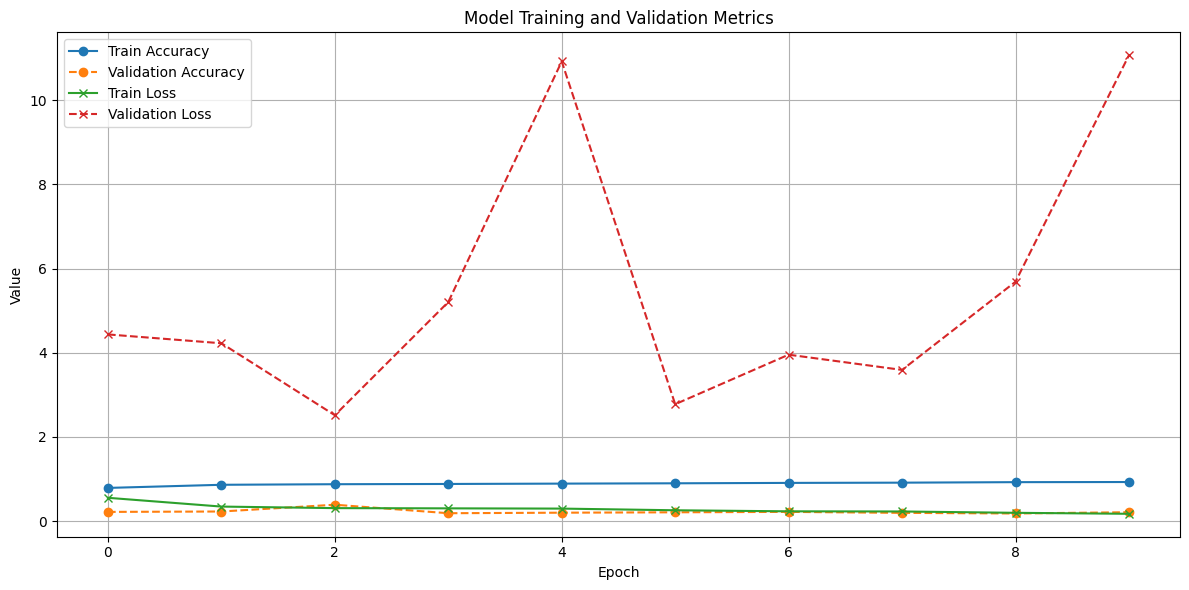

In [ ]:
import matplotlib.pyplot as plt

def plot_combined_history(history):

    plt.figure(figsize=(12, 6))


    plt.plot(history.history['accuracy'], label='Train Accuracy', linestyle='-', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='o')

    # Plot loss
    plt.plot(history.history['loss'], label='Train Loss', linestyle='-', marker='x')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='x')

    # Add title and labels
    plt.title('Model Training and Validation Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Value')

    # Add legend
    plt.legend(loc='best')

    # Display the grid
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Plot combined metrics
plot_combined_history(history)

64/64 ━━━━━━━━━━━━━━━━━━━━ 51s 621ms/step


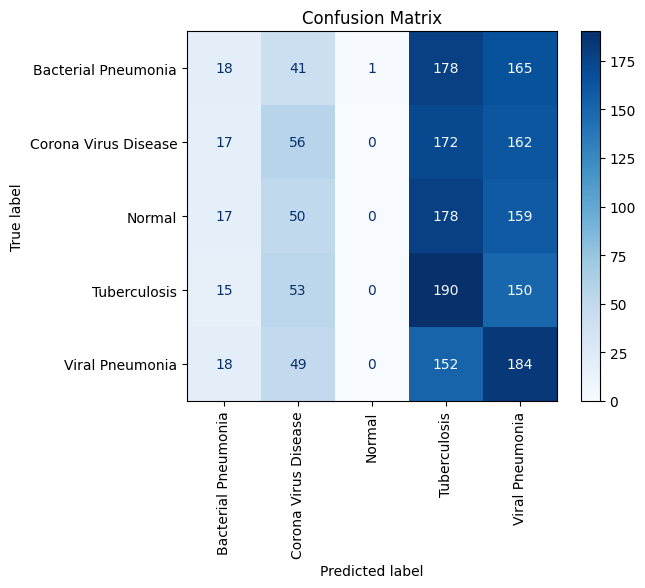

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


y_pred = my_model.predict(test_set, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels


y_true = test_set.classes


class_labels = list(test_set.class_indices.keys())


conf_matrix = confusion_matrix(y_true, y_pred_classes)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
my_model.save('/content/lungs_results.h5')

Saving lungs1.png to lungs1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


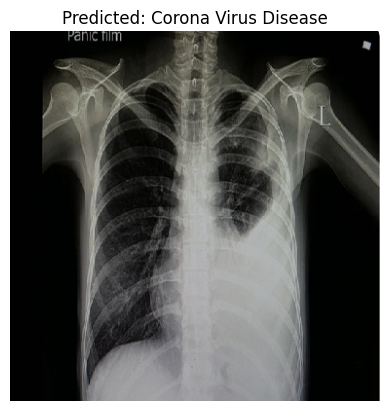

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('/content/lungs_results.h5')

# Class labels
class_labels = ['Bacterial Pneumonia', 'Corona Virus Disease', 'Normal', 'Tuberculosis', 'Viral Pneumonia']

def predict_lung_disease():
    # Upload an image
    uploaded = files.upload()

    for filename in uploaded.keys():
        img_path = filename
        img = image.load_img(img_path, target_size=(380, 380))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalize

        # Prediction
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions)
        predicted_label = class_labels[predicted_class]

        # Display image and prediction
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Predicted: {predicted_label}')
        plt.show()

# Run the prediction function
predict_lung_disease()